In [1]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

In [2]:
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","cyan","magenta","blue"])

In [3]:
sigmoid = lambda var: 1 / (1 + np.exp(var)**-1)

In [4]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
x = np.hstack((x, np.ones((4,1))))

y_hat = np.array([0, 1, 1, 0])

w1 = np.array([-1, 1, 0.25])
w2 = np.array([-1, 1, -0.25])

wz = np.array([-1.01, 1, 0.115])

y = np.dot(np.stack([w1, w2]), x.transpose()).transpose()
y = sigmoid(y)

z = np.dot(wz, np.hstack((y, np.ones((4, 1)))).transpose())
z = sigmoid(z)

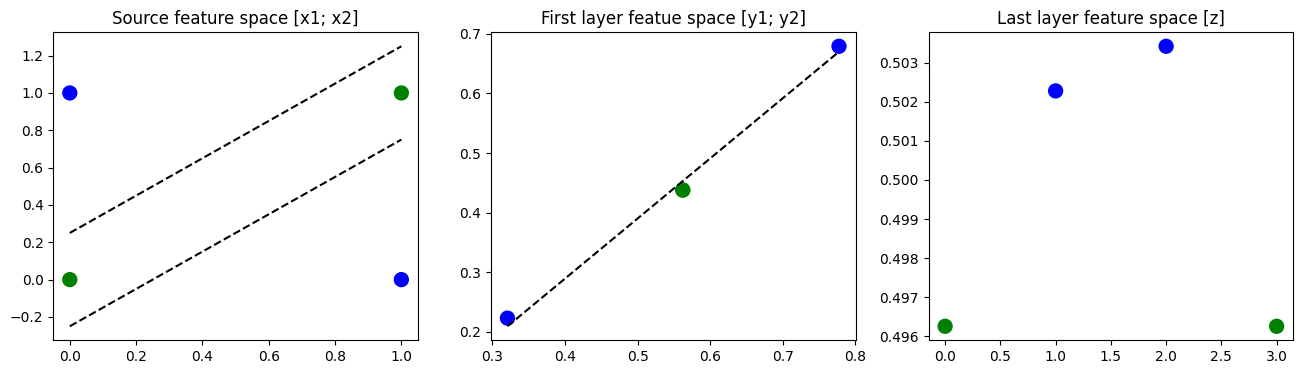

In [5]:
fig, axis = plt.subplots(nrows=1, ncols=3,figsize=(16,4))

axis[0].scatter(x[:,0],
                x[:,1],
                c=y_hat,
                vmin=min(y_hat),
                vmax=max(y_hat),
                cmap=color_map_discrete,
                s=100)

xx = np.linspace(min(x[:, 0]), max(x[:, 0]))

y1_w = w1
y2_w = w2

y1 = - (y1_w[2] / y1_w[1]) - (y1_w[0]*xx / y1_w[1])
y2 = - (y2_w[2] / y2_w[1]) - (y2_w[0]*xx / y2_w[1])  


axis[0].plot(xx, y1, 'k--')
axis[0].plot(xx, y2, 'k--')

axis[0].set_title("Source feature space [x1; x2]")


axis[1].scatter(y[:, 0],
                y[:, 1],
                c=y_hat,
                vmin=min(y_hat),
                vmax=max(y_hat),
                cmap=color_map_discrete,
                s=100)

axis[1].set_title("First layer featue space [y1; y2]")


zz = np.linspace(np.min(y[:, 0]), np.max(y))
z_w1 = wz[0]
z_w2 = wz[1]
z_yy = - (wz[2] / z_w2) - (z_w1*zz / z_w2) 

axis[1].plot(zz, z_yy, 'k--')

axis[2].scatter(list(range(len(z))),
                z,
                c=y_hat,
                vmin=min(y_hat),
                vmax=max(y_hat),
                cmap=color_map_discrete,
                s=100)

axis[2].set_title("Last layer feature space [z]")

fig.subplots_adjust(hspace=10,wspace=.2)
plt.show()